In [153]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importando DataSet

In [154]:
dataset = pd.read_csv('Employee_Compensation_SF.csv', sep=',')
# dataset = dataset.sample(100000)

# Exploring Data

# Gráfico da distribuição do Salários e Benefícios na Cidade

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


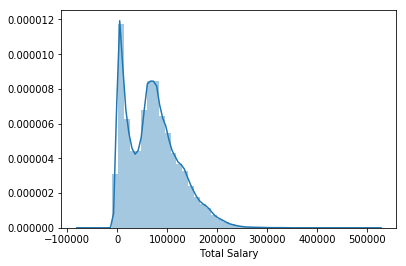

In [155]:
sns.distplot(dataset['Total Salary'])

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


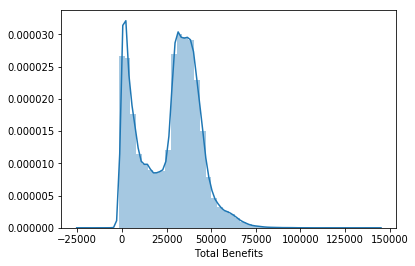

In [156]:
sns.distplot(dataset['Total Benefits'])

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


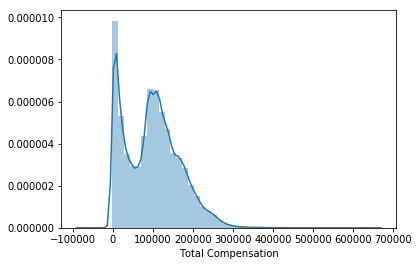

In [157]:
sns.distplot(dataset['Total Compensation'])

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


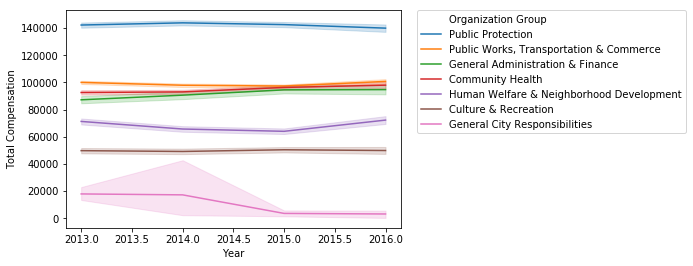

In [158]:
_ = sns.lineplot(x='Year',y='Total Compensation',hue='Organization Group',data=ds)
_.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


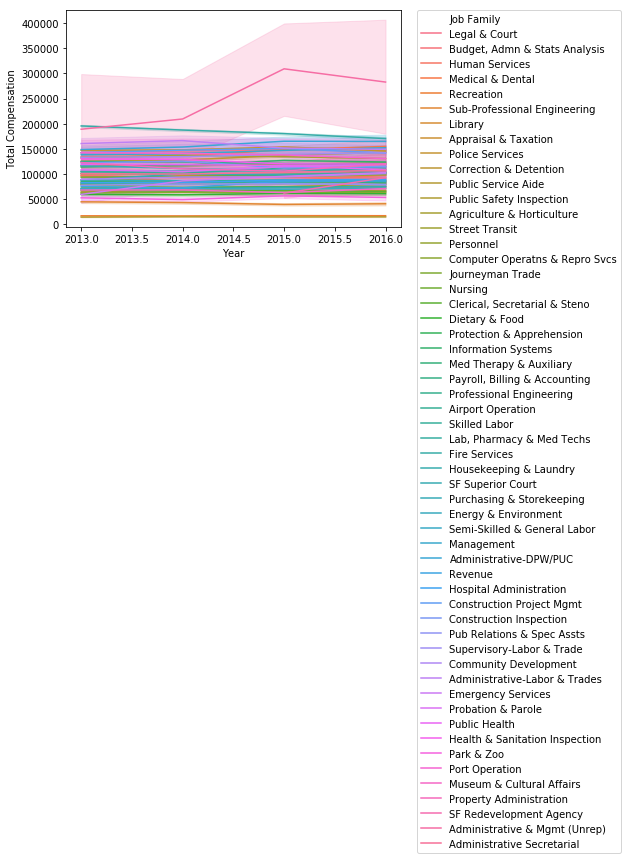

In [159]:
_ = sns.lineplot(x='Year',y='Total Compensation',hue='Job Family',data=dataset)
_.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

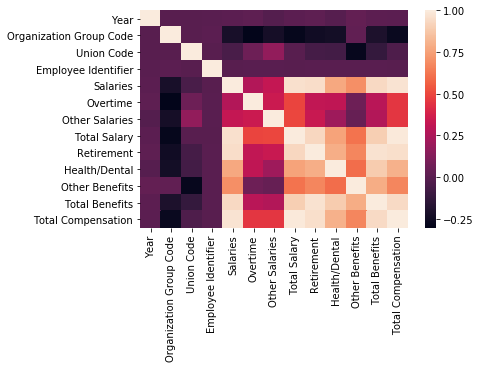

In [160]:
sns.heatmap(dataset.corr())

In [161]:
year_compensation = dataset.groupby(['Year']).mean().reset_index()[['Year','Total Compensation']]
year_compensation

,Year,Total Compensation
0,2013,97872.718129
1,2014,97087.853954
2,2015,97807.731425
3,2016,99658.289452


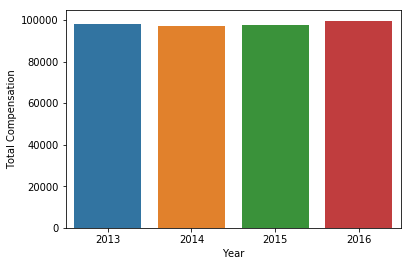

In [162]:
sns.barplot(x='Year', y='Total Compensation', data=year_compensation)

In [163]:
salary_year_organization = dataset.groupby(['Year','Organization Group']).mean().reset_index()[['Year','Organization Group','Total Compensation']]

# Settando Legenda para fora do Plot


Para nunca mais perder: 

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot/34579525


https://matplotlib.org/users/legend_guide.html

# Total Compensation ao longo do Tempo

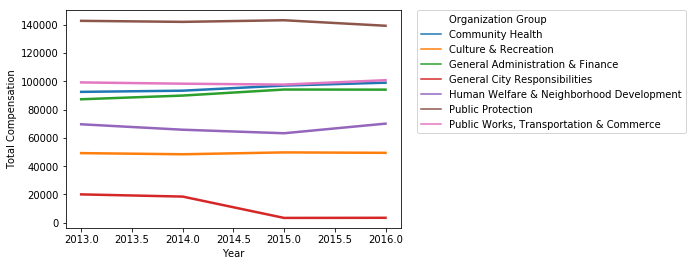

In [164]:
g = sns.lineplot(
    data=salary_year_organization,
    x='Year',
    y='Total Compensation',
    hue='Organization Group', 
    markers=True,
    linewidth=2.5)

g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Total Benefits ao longo do tempo

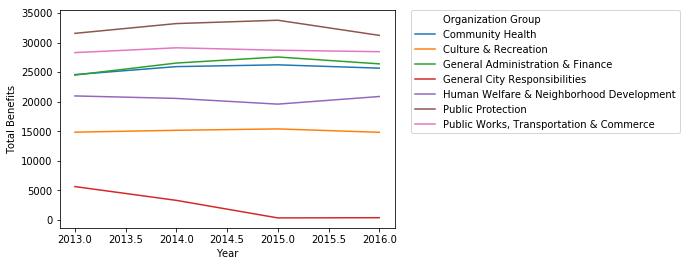

In [165]:
benefits_salary = dataset.groupby(['Year','Organization Group']).mean().reset_index()[['Year','Organization Group','Total Salary','Total Benefits']]

g = sns.lineplot(x='Year',y='Total Benefits', hue='Organization Group', data=benefits_salary)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


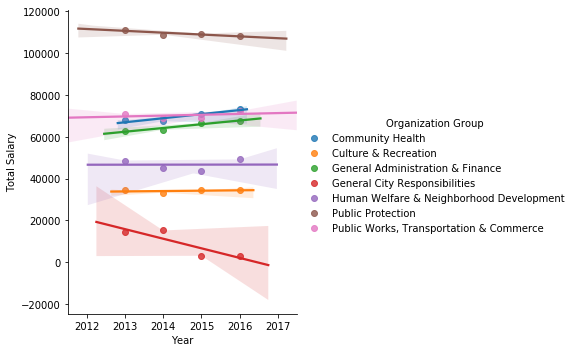

In [166]:
sns.lmplot(
    x='Year',
    y='Total Salary',
    hue='Organization Group',
    data=benefits_salary)

In [167]:
benefits_salary.groupby(['Organization Group']).corr()

Total Benefits  \
Organization Group                                                        
Community Health                         Total Benefits        1.000000   
                                         Total Salary          0.332780   
                                         Year                  0.641803   
Culture & Recreation                     Total Benefits        1.000000   
                                         Total Salary         -0.370298   
                                         Year                  0.075820   
General Administration & Finance         Total Benefits        1.000000   
                                         Total Salary          0.642453   
                                         Year                  0.679665   
General City Responsibilities            Total Benefits        1.000000   
                                         Total Salary          0.909604   
                                         Year                 -0.946114   
Human Welfare & Neighborhood Development Total Benefits        1.000000   
                                         Total Salary          0.895220   
                                         Year                 -0.257545   
Public Protection                        Total Benefits        1.000000   
                                         Total Salary         -0.081692   
                                         Year                 -0.048289   
Public Works, Transportation & Commerce  Total Benefits        1.000000   
                                         Total Salary         -0.715876   
                                         Year                  0.018757   

                                                         Total Salary  \
Organization Group                                                      
Community Health                         Total Benefits      0.332780   
                                         Total Salary        1.000000   
                                         Year                0.920139   
Culture & Recreation                     Total Benefits     -0.370298   
                                         Total Salary        1.000000   
                                         Year                0.381051   
General Administration & Finance         Total Benefits      0.642453   
                                         Total Salary        1.000000   
                                         Year                0.964006   
General City Responsibilities            Total Benefits      0.909604   
                                         Total Salary        1.000000   
                                         Year               -0.877441   
Human Welfare & Neighborhood Development Total Benefits      0.895220   
                                         Total Salary        1.000000   
                                         Year                0.007715   
Public Protection                        Total Benefits     -0.081692   
                                         Total Salary        1.000000   
                                         Year               -0.851807   
Public Works, Transportation & Commerce  Total Benefits     -0.715876   
                                         Total Salary        1.000000   
                                         Year                0.328410   

                                                             Year  
Organization Group                                                 
Community Health                         Total Benefits  0.641803  
                                         Total Salary    0.920139  
                                         Year            1.000000  
Culture & Recreation                     Total Benefits  0.075820  
                                         Total Salary    0.381051  
                                         Year            1.000000  
General Administration & Finance         Total Benefits  0.679665  
                                       

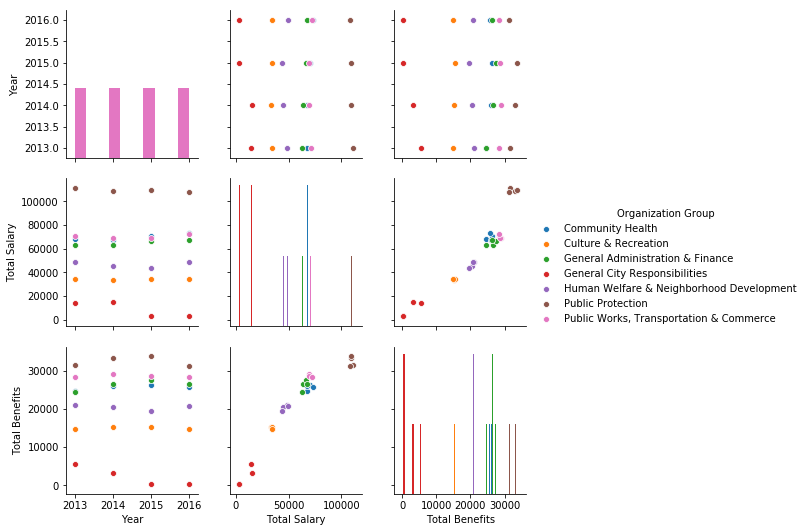

In [168]:
sns.pairplot(benefits_salary, hue='Organization Group', diag_kind='hist')

In [169]:
to_be_removed = ['Year Type','Union','Department','Organization Group Code','Department Code','Union Code','Job Family Code','Job Code','Job','Employee Identifier', 'Retirement','Health/Dental', 'Other Benefits', 'Salaries', 'Overtime','Other Salaries', 'Total Salary','Total Benefits']
ds = dataset.drop(to_be_removed,axis=1)
ds.head()

,Year,Organization Group,Job Family,Total Compensation
0,2016,Public Protection,Legal & Court,159436.65
1,2013,Culture & Recreation,"Budget, Admn & Stats Analysis",120054.05
2,2015,Community Health,Human Services,13868.64
3,2015,Community Health,Medical & Dental,3718.50
4,2014,Culture & Recreation,Recreation,10128.64


In [170]:
print(
    len(dataset['Job Family'].unique()),
    len(dataset['Department'].unique())
)

56 54


## Dropando as observações que possuem algum dado faltando

In [171]:
ds[ds.isnull().any(axis=1)].shape

(45, 4)

In [172]:
ds.drop(ds[ds.isnull().any(axis=1)].index, inplace=True)

In [173]:
ds.head()

,Year,Organization Group,Job Family,Total Compensation
0,2016,Public Protection,Legal & Court,159436.65
1,2013,Culture & Recreation,"Budget, Admn & Stats Analysis",120054.05
2,2015,Community Health,Human Services,13868.64
3,2015,Community Health,Medical & Dental,3718.50
4,2014,Culture & Recreation,Recreation,10128.64


In [186]:
extract_columns = ['Job Family','Organization Group']
_ds = pd.get_dummies(ds, columns=extract_columns, prefix=extract_columns)
_ds.head()

,Year,Total Compensation,Job Family_Administrative & Mgmt (Unrep),Job Family_Administrative Secretarial,Job Family_Administrative-DPW/PUC,Job Family_Administrative-Labor & Trades,Job Family_Agriculture & Horticulture,Job Family_Airport Operation,Job Family_Appraisal & Taxation,"Job Family_Budget, Admn & Stats Analysis",...,Job Family_Street Transit,Job Family_Sub-Professional Engineering,Job Family_Supervisory-Labor & Trade,Organization Group_Community Health,Organization Group_Culture & Recreation,Organization Group_General Administration & Finance,Organization Group_General City Responsibilities,Organization Group_Human Welfare & Neighborhood Development,Organization Group_Public Protection,"Organization Group_Public Works, Transportation & Commerce"
0,2016,159436.65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013,120054.05,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2015,13868.64,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2015,3718.50,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2014,10128.64,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [188]:
_ds.shape

(291780, 64)

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

In [221]:
regressor = Lasso()
linear_reg = LinearRegression()

X = _ds.drop(['Total Compensation'], axis=1)
y = _ds['Total Compensation'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [222]:
regressor.fit(X_train,y_train)
linear_reg.fit(X_train,y_train)

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [224]:
predict = regressor.predict(X_test)
linear_predict = linear_reg.predict(X_test)

print("Lasso: ", mean_squared_error(y_test,predict))
print("Linear: ", mean_squared_error(y_test,linear_predict))

Lasso:  3073064803.0887856
Linear:  3073171318.817725


In [210]:
predict[:10]

array([ 97499.62272777, 185680.99898488, 184357.68782532,  86077.42429096,
       149431.47715384,  16121.09787252, 148244.53226402,  89496.87555216,
        41676.95054492, 119612.94118561])

In [206]:
y_test[:10]

[92791.25,
 226531.85,
 231814.37,
 78744.49,
 60258.56,
 27853.33,
 211953.49,
 121006.43,
 21048.82,
 15460.97]